In [151]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [232]:
image = Image.open('./bird.jpg').convert('L')
pixels = np.array(image).flatten()

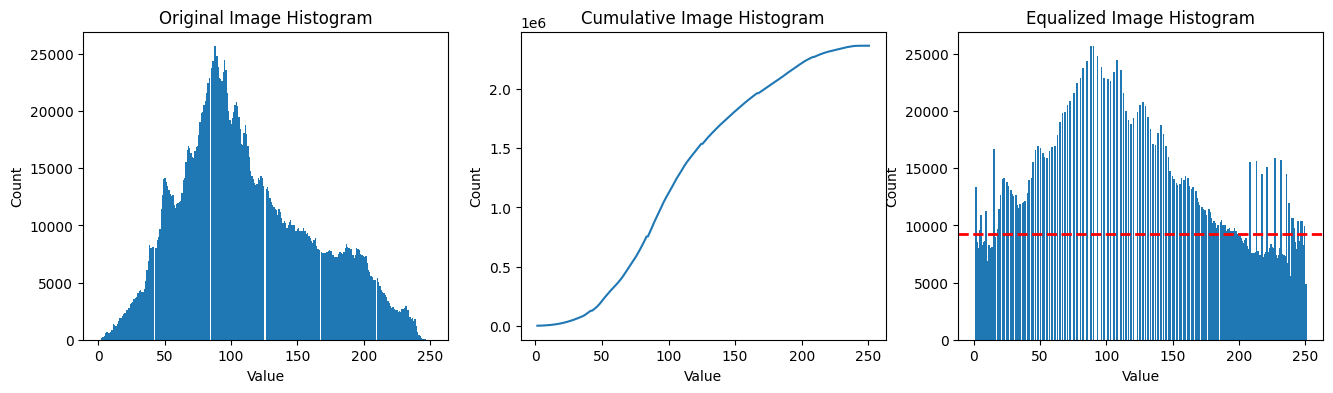

In [253]:
fig,ax = plt.subplots(1,3,figsize=(16,4))

ax[0].hist(x=pixels,bins=256)
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

y,x = np.histogram(pixels,256)
x = (x[1:]+x[:-1])/2
y_cumulative = np.zeros(len(y));
for i in range(len(y_cumulative)):
    y_cumulative[i] = sum(y[:i+1])

ax[1].plot(x,y_cumulative)
ax[1].set_title('Cumulative Image Histogram')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

number_of_pixels = len(pixels) / 256
indexes = np.zeros(256)
y_equalized = np.zeros(256)

for j in range(256):
    indexes[j] = np.max([0, np.round(y_cumulative[j]/number_of_pixels)-1])

for j in range(256):
    y_equalized[int(indexes[j])] += y[j]

ax[2].bar(x,y_equalized,width=1.2)
ax[2].axhline(y=number_of_pixels, color='r', linestyle='--', linewidth=2)
ax[2].set_title('Equalized Image Histogram')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Count')

plt.show()

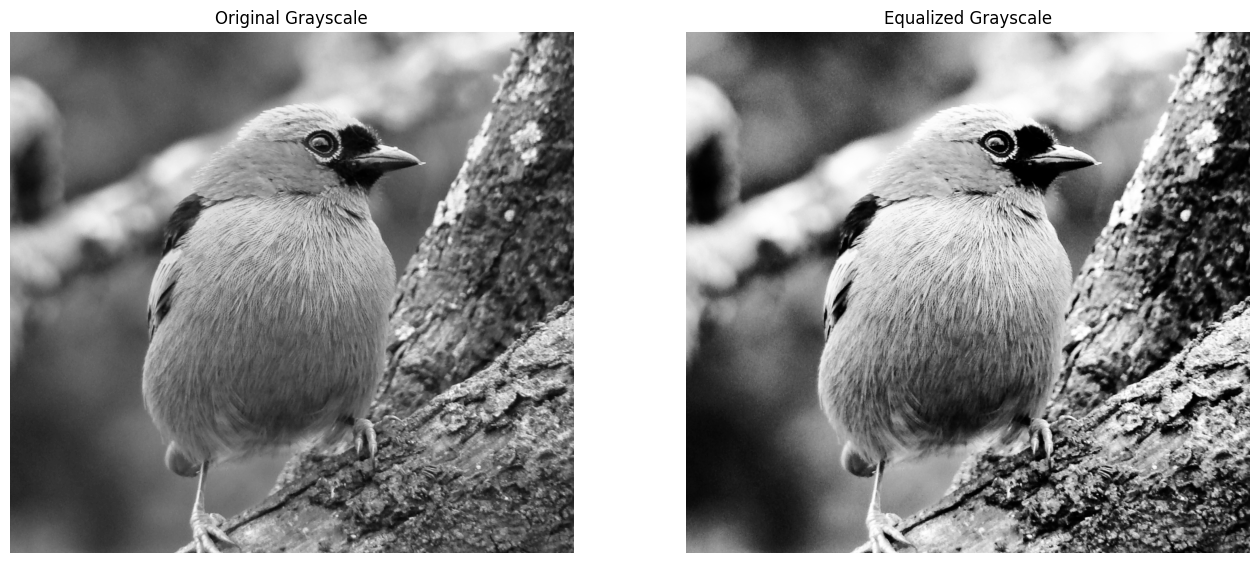

In [264]:
pixels_equalized = np.zeros(len(pixels))

for i in range(pixels_equalized.size):
    pixels_equalized[i] = int(indexes[pixels[i]])

width, height = image.size
reshaped_array = pixels_equalized.reshape((height, width))
new_image = Image.fromarray(reshaped_array.astype('uint8'))

fig,ax = plt.subplots(1,2,figsize=(16,16))

image.save('./bird_grayscale.jpg')
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Grayscale')
ax[0].axis('off')

new_image.save('./bird_equalized.jpg')
ax[1].set_title('Equalized Grayscale')
ax[1].imshow(new_image, cmap='gray')
ax[1].axis('off')

plt.show()